# **Exploratory Data Analysis (EDA) et contrôle qualité des données**

**Objectif du notebook** 

Ce notebook est dédié à la phase d’exploration et de préparation des données (Exploratory Data Analysis – EDA).
Il a pour objectif d’analyser la structure de la base de données, d’évaluer sa qualité et de réaliser les opérations de nettoyage nécessaires afin de produire un jeu de données fiable, cohérent et exploitable pour les étapes ultérieures du projet.

Les principales étapes abordées incluent :

- l’analyse descriptive des variables,
- l’identification des valeurs manquantes et aberrantes,
- la vérification de la cohérence des formats et des types de données,
- le traitement des duplications et incohérences,
- la préparation finale du dataset destiné à l’entraînement.

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub as kg



In [ ]:
# Download latest version
path = kg.dataset_download("yasserh/breast-cancer-dataset")

print("Path to dataset files:", path)

100%|██████████| 48.6k/48.6k [00:00<00:00, 747kB/s]

Extracting files...
Path to dataset files: /Users/vlad/.cache/kagglehub/datasets/yasserh/breast-cancer-dataset/versions/1


In [ ]:
# Trouver un fichier CSV dans le dossier téléchargé
csv_files = []
for root, _, files in os.walk(path):
    for f in files:
        if f.lower().endswith(".csv"):
            csv_files.append(os.path.join(root, f))

if not csv_files:
    raise FileNotFoundError("Aucun fichier .csv trouvé dans le dossier téléchargé.")

csv_path = csv_files[0]  # premier CSV trouvé
print("CSV utilisé :", csv_path)

# Charger le dataset
df = pd.read_csv(csv_path)

# Afficher les dimensions du dataset
print("Shape du dataset :", df.shape)

# Informations générales sur les variables
df.info()

# Afficher le début du dataset
print(df.head())

# Afficher nb lignes, nb colonnes, nb total d'observations (cellules)
n_rows, n_cols = df.shape
print("Nombre de lignes :", n_rows)
print("Nombre de colonnes :", n_cols)
print("Nombre total d'observations :", n_rows * n_cols)


CSV utilisé : /Users/vlad/.cache/kagglehub/datasets/yasserh/breast-cancer-dataset/versions/1/breast-cancer.csv
Shape du dataset : (569, 32)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

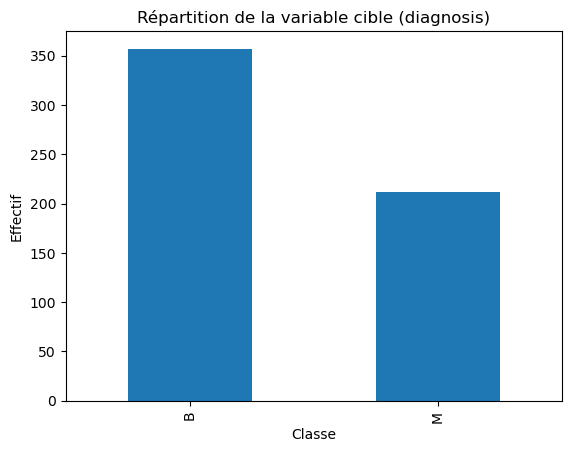

In [35]:
# Analyse de la varible cible 

# Distribution de la variable cible
df["diagnosis"].value_counts()
# Proportion des classes
df["diagnosis"].value_counts(normalize=True)
# Visualisation simple
df["diagnosis"].value_counts().plot(kind="bar")
plt.title("Répartition de la variable cible (diagnosis)")
plt.xlabel("Classe")
plt.ylabel("Effectif")
plt.show()


In [36]:
#Identification des variables non informatives

df.columns
# Vérifier l'unicité de l'identifiant
df["id"].nunique(), len(df)


(569, 569)

In [37]:
#Valeurs manquantes 

# Nombre de valeurs manquantes par variable
df.isnull().sum()
# Pourcentage de valeurs manquantes
(df.isnull().mean() * 100).sort_values(ascending=False)
# Vérification globale
df.isnull().any().any()


False

In [38]:
#Détection des doublons

# Nombre de lignes dupliquées
df.duplicated().sum()
# Aperçu éventuel des doublons
df[df.duplicated()]


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [39]:
#Analyse des types de variables 

df.dtypes
# Variables numériques
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
num_cols
# Variables catégorielles
cat_cols = df.select_dtypes(include=["object"]).columns
cat_cols


Index(['diagnosis'], dtype='object')

In [40]:
#Statistiques descriptives 

df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


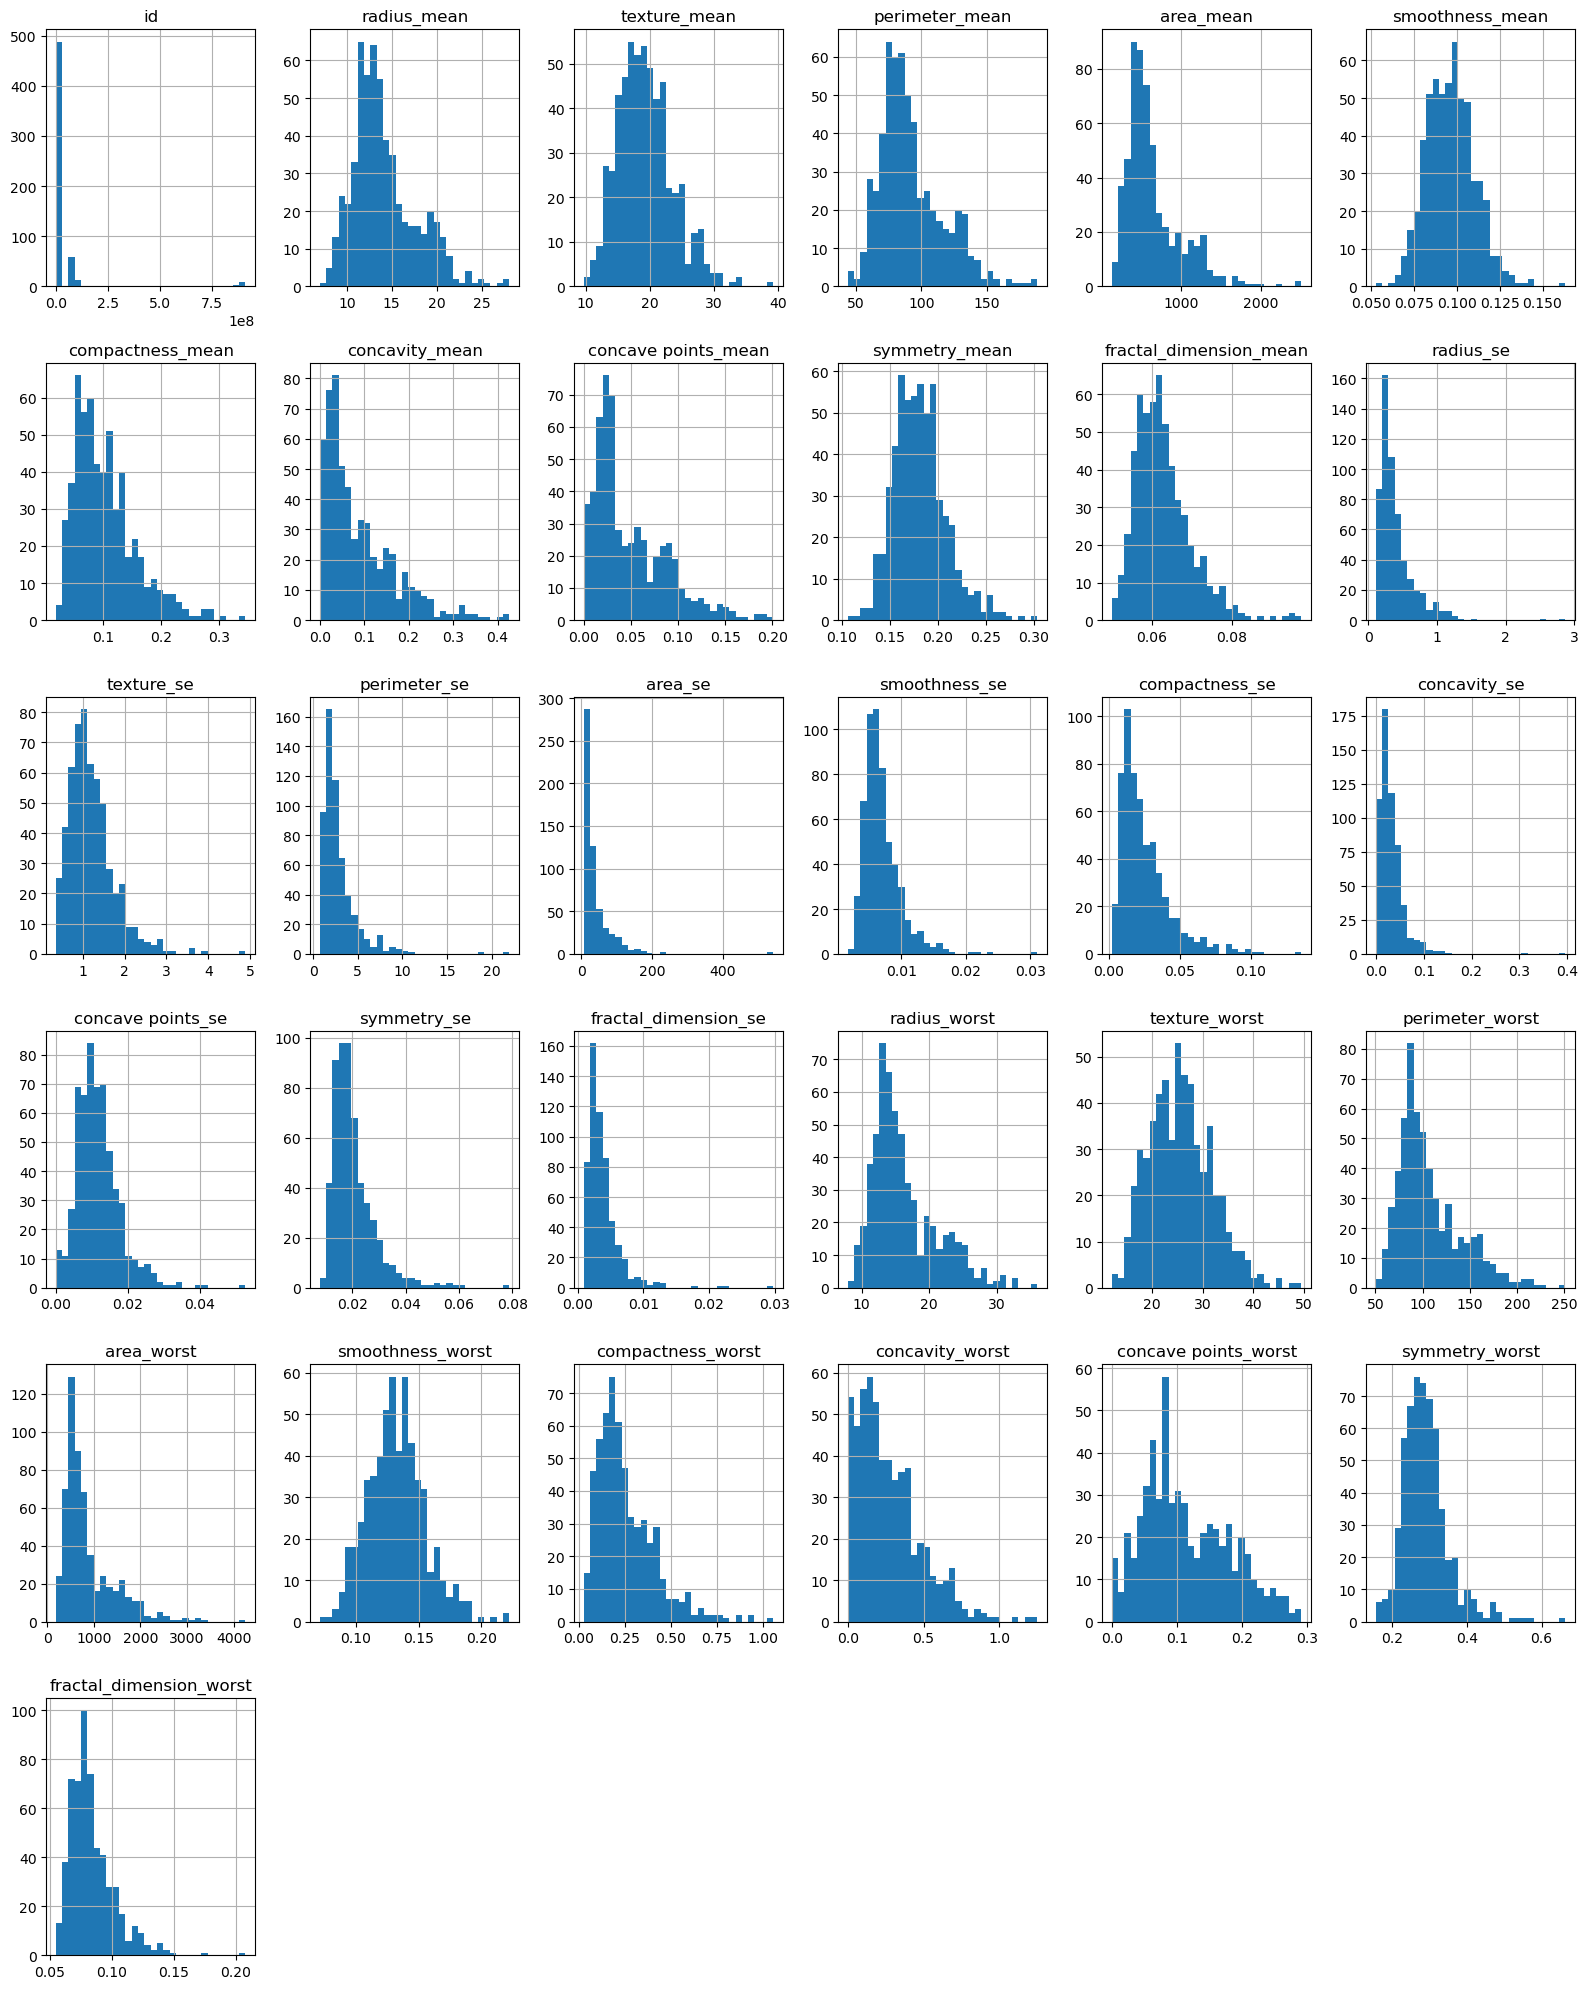

In [41]:
#Analyse des distributions 

df[num_cols].hist(figsize=(16, 20), bins=30)
plt.tight_layout()
plt.show()


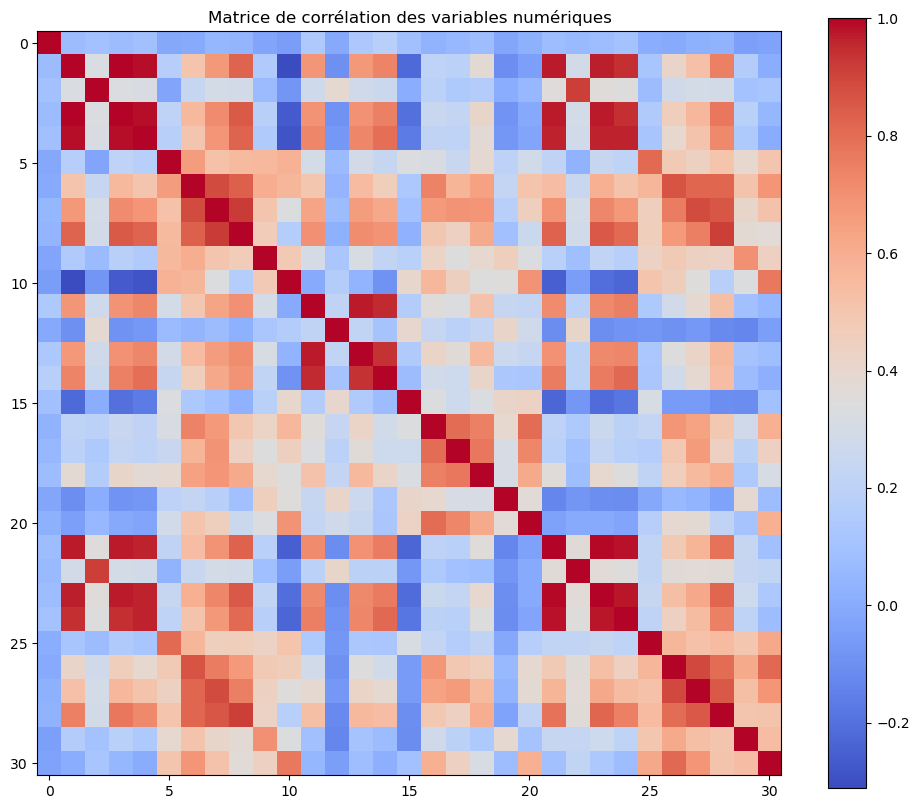

In [42]:
#Corrélation 

corr_matrix = df[num_cols].corr()
plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap="coolwarm")
plt.colorbar()
plt.title("Matrice de corrélation des variables numériques")
plt.show()


In [44]:
#Préparation du data set propre

# Copie de travail
df_clean = df.copy()

# Suppression de l'identifiant
df_clean.drop(columns=["id"], inplace=True)

df_clean.shape


(569, 31)

In [45]:
#Vérification nom des colonnes 

list(df.columns)


['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [46]:
#Détection espace avant/après les noms 

cols_with_spaces = [col for col in df.columns if col != col.strip()]
cols_with_spaces


[]

In [47]:
#Vérification colonnes dupliqués

df.columns[df.columns.duplicated()]


Index([], dtype='object')

In [48]:
#Détection des colonnes inutiles ou non informatives

# Colonnes constantes (une seule valeur)
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
constant_cols


[]

In [49]:
df.shape

(569, 32)